## Special Topics - Deep Learning Applications

#### Prof. Thomas da Silva Paula

### Faster R-CNN demo

* Pytorch implementation
* Using Faster R-CNN with ResNet 50 backbone, trained on MSCOCO, from torchvision

### Imports

In [7]:
import cv2
import sys
import json
import pprint

import numpy as np
from PIL import Image

import torchvision
import matplotlib.pyplot as plt
import matplotlib.patches as patches


plt.rcParams['figure.figsize'] = [14, 10]

### Useful methods

In [2]:
def read_img(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

def load_coco_dict(labels_path):
    with open(labels_path, 'r') as f:
        coco_labels = json.load(f)

    labels_dict = {}
    for info in coco_labels['labels']:
        labels_dict[info['id']] = info['label']
        
    return labels_dict

### Loading pre-trained model

The detection models were made available in Pytorch 1.1 and Torchvision 0.3, so you might need to upgrade your packages before using the model

In [ ]:
!pip install torchvision --upgrade

In [4]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
        )
  

### Loading trained model and COCO labels

In [5]:
labels_dict = load_coco_dict('coco_labels.txt')

### Inspecting image

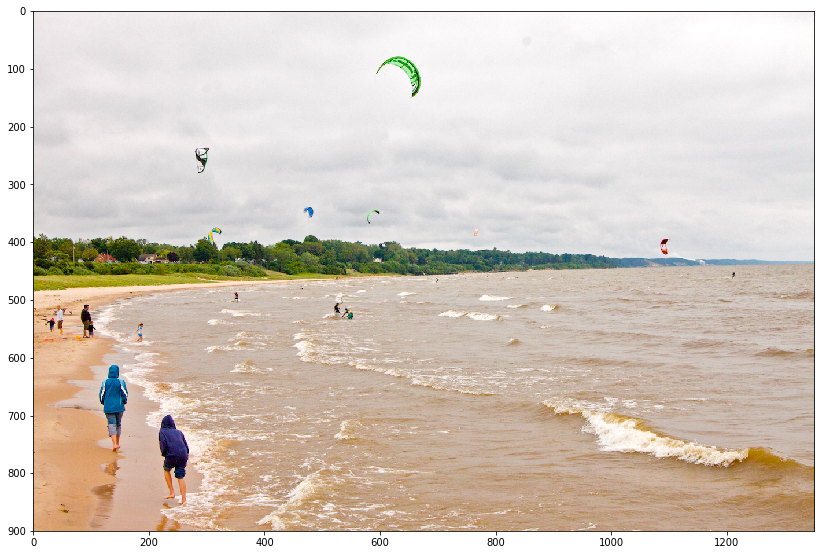

In [13]:
img_path = '../../sample_images/beach.jpg'
img = read_img(img_path)
height, width, _ = img.shape
plt.imshow(img)

### Running inference

In [14]:
image = Image.open(img_path)
image_tensor = torchvision.transforms.functional.to_tensor(image)

In [15]:
%%time
output = model([image_tensor])

CPU times: user 9.71 s, sys: 1.45 s, total: 11.2 s
Wall time: 6.12 s


In [17]:
%%time
pprint.pprint(output)

[{'boxes': tensor([[ 215.7913,  695.3066,  270.7641,  855.9386],
        [ 111.9192,  611.8886,  164.9617,  763.3187],
        [ 594.8027,   77.9598,  670.4895,  151.4964],
        [ 280.2611,  237.1154,  304.1601,  283.0359],
        [ 577.0441,  344.6582,  599.6679,  370.6177],
        [1083.4158,  394.0966, 1100.8839,  424.0855],
        [ 469.0971,  341.0177,  484.9357,  358.9344],
        [  82.2343,  507.9387,  107.0524,  566.4019],
        [ 520.3151,  505.9960,  532.0944,  525.9926],
        [ 534.2235,  514.7147,  553.5134,  534.7492],
        [  36.9923,  512.0062,   54.2548,  558.7717],
        [ 178.0207,  541.1418,  191.9594,  572.6298],
        [ 347.7566,  487.1436,  356.3812,  505.1840],
        [ 301.9599,  374.4996,  326.3046,  408.2704],
        [  24.3386,  529.4717,   39.2459,  555.4383],
        [1206.9381,  452.4211, 1214.2988,  462.8264],
        [ 516.0777,  505.0671,  534.8891,  531.2031],
        [ 461.0206,  473.4846,  467.9352,  482.0889],
        [ 877.127

### Plots detections
Using the `confidence_threshold`. You can notice the difference from Tensorflow in the output boxes, since in this case we do not need to rescale them. We keep the same names as before (left, right, top, bottom) only for reference since we could use them directly

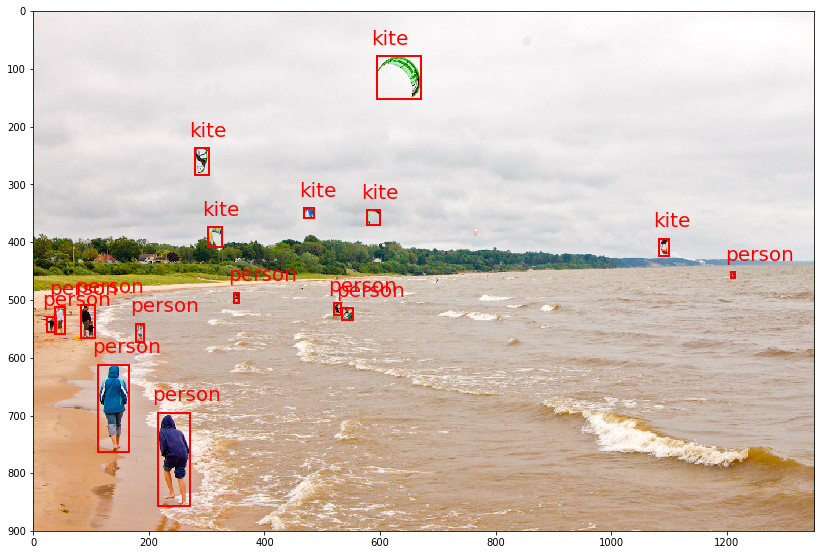

In [18]:
fig, ax = plt.subplots(1)
img = read_img(img_path)
confidence_threshold = .8

for box, cls_id, score in zip(output[0]['boxes'],
                              output[0]['labels'],
                              output[0]['scores']):
    
    xmin, ymin, xmax, ymax = box.data.numpy()
    s = score.data.numpy()
    c = int(cls_id.data.numpy())
    
    if s > confidence_threshold:
        # With TF, here we had to reescale the output
        (left, right, top, bottom) = (xmin, xmax,
                                      ymin, ymax)
        rect = patches.Rectangle((left, top),
                                 right-left,
                                 bottom-top,
                                 linewidth=2, edgecolor='r',
                                 facecolor='none')
        ax.add_patch(rect)
        plt.text(left-10, top-20, labels_dict[c], fontsize=20, color='r')
ax.imshow(img)